In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
import pandas as pd

# Load OWID CO2 dataset
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df_co2 = pd.read_csv(url)

print("Dataset loaded!")
print("Shape:", df_co2.shape)
df_co2.head()


Dataset loaded!
Shape: (50191, 79)


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Check missing values per column
missing = df_co2.isnull().sum().sort_values(ascending=False)
print(missing.head(20))  # top 20 columns with most missing data

# Check column names
print(df_co2.columns.tolist())


share_global_cumulative_other_co2      48083
share_global_other_co2                 48083
other_co2_per_capita                   47717
cumulative_other_co2                   46989
other_industry_co2                     46989
consumption_co2_per_gdp                45747
consumption_co2_per_capita             45689
trade_co2                              45656
trade_co2_share                        45656
consumption_co2                        45325
energy_per_gdp                         42495
co2_including_luc_per_unit_energy      40490
energy_per_capita                      40082
primary_energy_consumption             40040
co2_per_unit_energy                    39841
share_global_flaring_co2               39322
share_global_cumulative_flaring_co2    39322
flaring_co2_per_capita                 35497
share_global_cumulative_gas_co2        35157
share_global_gas_co2                   35157
dtype: int64
['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capi

In [20]:
# Select relevant columns
cols_to_keep = [
    'country', 'year', 'population', 'gdp', 'co2', 'co2_per_capita',
    'cumulative_co2', 'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2',
    'flaring_co2', 'land_use_change_co2', 'co2_growth_abs', 'co2_growth_prct',
    'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2_per_capita', 
    'oil_co2_per_capita', 'gas_co2_per_capita'
]

df_clean = df_co2[cols_to_keep].copy()

# Handle missing values: fill numeric columns with 0 (or you can choose other strategies)
numeric_cols = df_clean.select_dtypes(include='number').columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(0)

print("Clean dataset shape:", df_clean.shape)
df_clean.head()


Clean dataset shape: (50191, 20)


,country,year,population,gdp,co2,co2_per_capita,cumulative_co2,coal_co2,oil_co2,gas_co2,cement_co2,flaring_co2,land_use_change_co2,co2_growth_abs,co2_growth_prct,co2_per_gdp,co2_per_unit_energy,coal_co2_per_capita,oil_co2_per_capita,gas_co2_per_capita
0,Afghanistan,1750,2802560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Avoid division by zero by replacing 0 CO2 with NaN temporarily
df_clean['co2_nonzero'] = df_clean['co2'].replace(0, pd.NA)

# 1️⃣ Fossil fuel shares
df_clean['coal_share'] = df_clean['coal_co2'] / df_clean['co2_nonzero']
df_clean['oil_share']  = df_clean['oil_co2']  / df_clean['co2_nonzero']
df_clean['gas_share']  = df_clean['gas_co2']  / df_clean['co2_nonzero']
df_clean['total_fossil_share'] = (df_clean['coal_co2'] + df_clean['oil_co2'] + df_clean['gas_co2']) / df_clean['co2_nonzero']

# 2️⃣ CO2 per capita growth (year-on-year)
df_clean['co2_per_capita_growth'] = df_clean.groupby('country')['co2_per_capita'].diff()

# 3️⃣ Total fossil CO2 (coal+oil+gas)
df_clean['fossil_co2'] = df_clean['coal_co2'] + df_clean['oil_co2'] + df_clean['gas_co2']

# 4️⃣ CO2 per GDP (already exists), optionally scale
df_clean['co2_per_gdp_scaled'] = df_clean['co2_per_gdp'] * 1e6  # scale to million units

# Drop temporary column
df_clean.drop(columns=['co2_nonzero'], inplace=True)

# Preview
df_clean.head(10)


,country,year,population,gdp,co2,co2_per_capita,cumulative_co2,coal_co2,oil_co2,gas_co2,...,coal_co2_per_capita,oil_co2_per_capita,gas_co2_per_capita,coal_share,oil_share,gas_share,total_fossil_share,co2_per_capita_growth,fossil_co2,co2_per_gdp_scaled
0,Afghanistan,1750,2802560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,<NA>,<NA>,<NA>,<NA>,NaN,0.0,0.0
1,Afghanistan,1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0
2,Afghanistan,1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0
3,Afghanistan,1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0
4,Afghanistan,1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0
5,Afghanistan,1755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0
6,Afghanistan,1756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0
7,Afghanistan,1757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0
8,Afghanistan,1758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0
9,Afghanistan,1759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0


In [22]:
import pandas as pd

url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df_co2 = pd.read_csv(url)

print(df_co2.shape)   # should be (50k+, 79)
print(df_co2.head())  # check first few rows


(50191, 79)
       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                             

In [23]:
df_co2_recent = df_co2[df_co2['year'] >= 1950].copy()
print(df_co2_recent.shape)
df_co2_recent.head()


(18764, 79)


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
200,Afghanistan,1950,AFG,7776182.0,9.421400e+09,0.0,0.0,0.084,0.070,475.000,...,NaN,0.128,0.0,0.0,0.001,0.0,19.447,1.453,NaN,NaN
201,Afghanistan,1951,AFG,7879343.0,9.692280e+09,0.0,0.0,0.092,0.007,8.696,...,NaN,0.128,0.0,0.0,0.001,0.0,20.458,1.473,NaN,NaN
202,Afghanistan,1952,AFG,7987783.0,1.001733e+10,0.0,0.0,0.092,0.000,0.000,...,NaN,0.128,0.0,0.0,0.001,0.0,21.356,1.484,NaN,NaN
203,Afghanistan,1953,AFG,8096703.0,1.063052e+10,0.0,0.0,0.106,0.015,16.000,...,NaN,0.128,0.0,0.0,0.001,0.0,22.361,1.517,NaN,NaN
204,Afghanistan,1954,AFG,8207953.0,1.086636e+10,0.0,0.0,0.106,0.000,0.000,...,NaN,0.128,0.0,0.0,0.001,0.0,23.256,1.534,NaN,NaN


In [24]:
cols_to_keep = [
    'country', 'year', 'population', 'gdp', 'co2', 'co2_per_capita',
    'cumulative_co2', 'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2',
    'flaring_co2', 'land_use_change_co2', 'co2_growth_abs', 'co2_growth_prct',
    'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2_per_capita', 
    'oil_co2_per_capita', 'gas_co2_per_capita'
]

df_clean = df_co2_recent[cols_to_keep].copy()

# Fill numeric missing values with 0
numeric_cols = df_clean.select_dtypes(include='number').columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(0)

df_clean.head(10)


,country,year,population,gdp,co2,co2_per_capita,cumulative_co2,coal_co2,oil_co2,gas_co2,cement_co2,flaring_co2,land_use_change_co2,co2_growth_abs,co2_growth_prct,co2_per_gdp,co2_per_unit_energy,coal_co2_per_capita,oil_co2_per_capita,gas_co2_per_capita
200,Afghanistan,1950,7776182.0,9.421400e+09,0.084,0.011,0.099,0.021,0.063,0.0,0.000,0.0,7.232,0.070,475.000,0.009,0.0,0.003,0.008,0.0
201,Afghanistan,1951,7879343.0,9.692280e+09,0.092,0.012,0.191,0.026,0.066,0.0,0.000,0.0,8.172,0.007,8.696,0.009,0.0,0.003,0.008,0.0
202,Afghanistan,1952,7987783.0,1.001733e+10,0.092,0.011,0.282,0.032,0.060,0.0,0.000,0.0,9.101,0.000,0.000,0.009,0.0,0.004,0.007,0.0
203,Afghanistan,1953,8096703.0,1.063052e+10,0.106,0.013,0.388,0.038,0.068,0.0,0.000,0.0,10.162,0.015,16.000,0.010,0.0,0.005,0.008,0.0
204,Afghanistan,1954,8207953.0,1.086636e+10,0.106,0.013,0.495,0.043,0.064,0.0,0.000,0.0,11.031,0.000,0.000,0.010,0.0,0.005,0.008,0.0
205,Afghanistan,1955,8326981.0,1.107819e+10,0.154,0.018,0.649,0.062,0.092,0.0,0.000,0.0,12.093,0.048,44.828,0.014,0.0,0.007,0.011,0.0
206,Afghanistan,1956,8454302.0,1.158124e+10,0.183,0.022,0.832,0.062,0.121,0.0,0.000,0.0,13.009,0.029,19.048,0.016,0.0,0.007,0.014,0.0
207,Afghanistan,1957,8588340.0,1.157897e+10,0.293,0.034,1.125,0.077,0.216,0.0,0.000,0.0,13.960,0.110,60.000,0.025,0.0,0.009,0.025,0.0
208,Afghanistan,1958,8723412.0,1.223884e+10,0.330,0.038,1.455,0.092,0.238,0.0,0.000,0.0,14.984,0.037,12.500,0.027,0.0,0.011,0.027,0.0
209,Afghanistan,1959,8869271.0,1.257987e+10,0.385,0.043,1.839,0.110,0.256,0.0,0.018,0.0,15.633,0.055,16.621,0.031,0.0,0.012,0.029,0.0


In [26]:
# Avoid division by zero
df_clean['co2_nonzero'] = df_clean['co2'].replace(0, pd.NA)

# Calculate fuel shares
df_clean['coal_share'] = df_clean['coal_co2'] / df_clean['co2_nonzero']
df_clean['oil_share']  = df_clean['oil_co2']  / df_clean['co2_nonzero']
df_clean['gas_share']  = df_clean['gas_co2']  / df_clean['co2_nonzero']
df_clean['total_fossil_share'] = (df_clean['coal_co2'] + df_clean['oil_co2'] + df_clean['gas_co2']) / df_clean['co2_nonzero']


In [27]:
df_clean['co2_per_capita_growth'] = df_clean.groupby('country')['co2_per_capita'].diff()


In [28]:
df_clean['fossil_co2'] = df_clean['coal_co2'] + df_clean['oil_co2'] + df_clean['gas_co2']


In [29]:
df_clean['co2_per_gdp_scaled'] = df_clean['co2_per_gdp'] * 1e6  # scale to million units


In [30]:
df_clean.drop(columns=['co2_nonzero'], inplace=True)


In [31]:
# Display first 10 rows of the cleaned & feature-engineered dataset
df_clean.head(10)


,country,year,population,gdp,co2,co2_per_capita,cumulative_co2,coal_co2,oil_co2,gas_co2,...,coal_co2_per_capita,oil_co2_per_capita,gas_co2_per_capita,coal_share,oil_share,gas_share,total_fossil_share,co2_per_capita_growth,fossil_co2,co2_per_gdp_scaled
200,Afghanistan,1950,7776182.0,9.421400e+09,0.084,0.011,0.099,0.021,0.063,0.0,...,0.003,0.008,0.0,0.25,0.75,0.0,1.0,NaN,0.084,9000.0
201,Afghanistan,1951,7879343.0,9.692280e+09,0.092,0.012,0.191,0.026,0.066,0.0,...,0.003,0.008,0.0,0.282609,0.717391,0.0,1.0,0.001,0.092,9000.0
202,Afghanistan,1952,7987783.0,1.001733e+10,0.092,0.011,0.282,0.032,0.060,0.0,...,0.004,0.007,0.0,0.347826,0.652174,0.0,1.0,-0.001,0.092,9000.0
203,Afghanistan,1953,8096703.0,1.063052e+10,0.106,0.013,0.388,0.038,0.068,0.0,...,0.005,0.008,0.0,0.358491,0.641509,0.0,1.0,0.002,0.106,10000.0
204,Afghanistan,1954,8207953.0,1.086636e+10,0.106,0.013,0.495,0.043,0.064,0.0,...,0.005,0.008,0.0,0.40566,0.603774,0.0,1.009434,0.000,0.107,10000.0
205,Afghanistan,1955,8326981.0,1.107819e+10,0.154,0.018,0.649,0.062,0.092,0.0,...,0.007,0.011,0.0,0.402597,0.597403,0.0,1.0,0.005,0.154,14000.0
206,Afghanistan,1956,8454302.0,1.158124e+10,0.183,0.022,0.832,0.062,0.121,0.0,...,0.007,0.014,0.0,0.338798,0.661202,0.0,1.0,0.004,0.183,16000.0
207,Afghanistan,1957,8588340.0,1.157897e+10,0.293,0.034,1.125,0.077,0.216,0.0,...,0.009,0.025,0.0,0.262799,0.737201,0.0,1.0,0.012,0.293,25000.0
208,Afghanistan,1958,8723412.0,1.223884e+10,0.330,0.038,1.455,0.092,0.238,0.0,...,0.011,0.027,0.0,0.278788,0.721212,0.0,1.0,0.004,0.330,27000.0
209,Afghanistan,1959,8869271.0,1.257987e+10,0.385,0.043,1.839,0.110,0.256,0.0,...,0.012,0.029,0.0,0.285714,0.664935,0.0,0.950649,0.005,0.366,31000.0


In [32]:
df_clean.to_csv("co2_clean_features.csv", index=False)


In [39]:
df = pd.read_csv(r"C:\Users\Vedant\Desktop\harsh\Global Climate & Pollution Analysis\co2_clean_features.csv")


In [40]:
# Dataset info (column names, dtypes, missing values)
print(df.info())

# Quick summary stats (numerical columns)
print(df.describe())

# Check missing values per column
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18764 entries, 0 to 18763
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                18764 non-null  object 
 1   year                   18764 non-null  int64  
 2   population             18764 non-null  float64
 3   gdp                    18764 non-null  float64
 4   co2                    18764 non-null  float64
 5   co2_per_capita         18764 non-null  float64
 6   cumulative_co2         18764 non-null  float64
 7   coal_co2               18764 non-null  float64
 8   oil_co2                18764 non-null  float64
 9   gas_co2                18764 non-null  float64
 10  cement_co2             18764 non-null  float64
 11  flaring_co2            18764 non-null  float64
 12  land_use_change_co2    18764 non-null  float64
 13  co2_growth_abs         18764 non-null  float64
 14  co2_growth_prct        18764 non-null  float64
 15  co

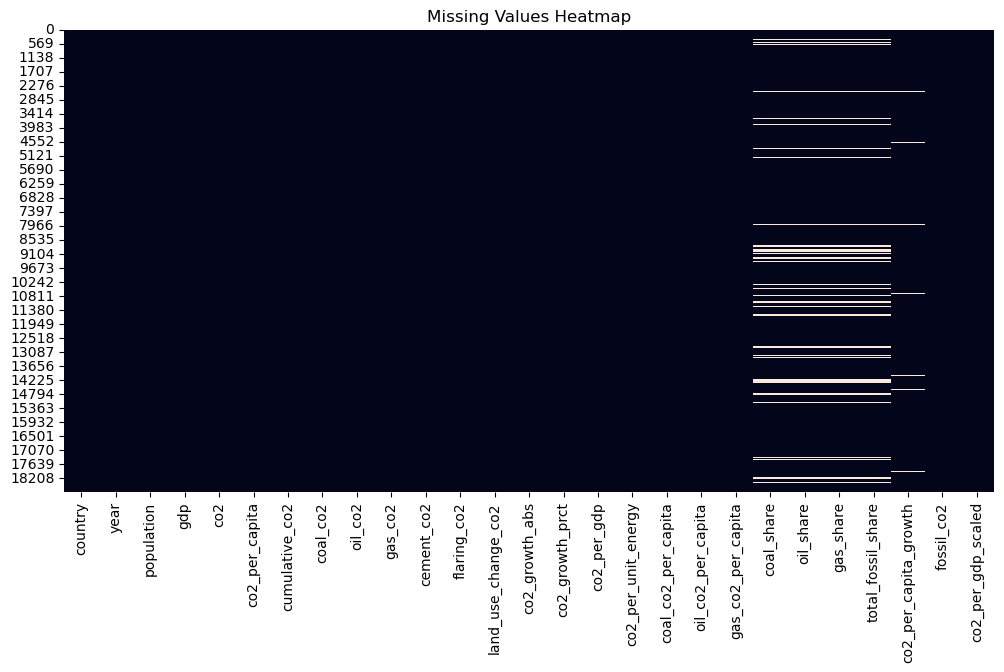

oil_share                8.463014
gas_share                8.463014
total_fossil_share       8.463014
coal_share               8.463014
co2_per_capita_growth    1.358985
co2_per_capita           0.000000
co2                      0.000000
gdp                      0.000000
country                  0.000000
year                     0.000000
population               0.000000
cement_co2               0.000000
gas_co2                  0.000000
oil_co2                  0.000000
coal_co2                 0.000000
cumulative_co2           0.000000
flaring_co2              0.000000
co2_growth_abs           0.000000
land_use_change_co2      0.000000
oil_co2_per_capita       0.000000
dtype: float64


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# Percentage of missing values per column
missing_percent = (df.isna().sum() / len(df)) * 100
print(missing_percent.sort_values(ascending=False).head(20))


In [42]:
df = df.dropna(thresh=len(df)*0.5, axis=1)



In [43]:
df = df.groupby("country").apply(lambda group: group.ffill().bfill())
df.reset_index(drop=True, inplace=True)


C:\Users\Vedant\AppData\Local\Temp\ipykernel_26016\1053111517.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("country").apply(lambda group: group.ffill().bfill())


In [44]:
def clean_dataset(df, drop_thresh=0.5):
    """
    Clean dataset by:
    1. Dropping columns with too many NaN values
    2. Forward & backward filling missing values within each country
    3. Resetting index
    
    Parameters:
        df (pd.DataFrame): Input dataset
        drop_thresh (float): Minimum fraction of non-NaN values to keep column (default 0.5)
    
    Returns:
        pd.DataFrame: Cleaned dataset
    """
    # Step 1: Drop columns with > (1-drop_thresh)% missing values
    df = df.dropna(thresh=len(df)*drop_thresh, axis=1)
    
    # Step 2: Forward & backward fill within each country
    df = df.groupby("country").apply(lambda group: group.ffill().bfill())
    
    # Step 3: Reset index
    df.reset_index(drop=True, inplace=True)
    
    return df


In [45]:
df_clean = clean_dataset(df)
print(df_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18764 entries, 0 to 18763
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                18764 non-null  object 
 1   year                   18764 non-null  int64  
 2   population             18764 non-null  float64
 3   gdp                    18764 non-null  float64
 4   co2                    18764 non-null  float64
 5   co2_per_capita         18764 non-null  float64
 6   cumulative_co2         18764 non-null  float64
 7   coal_co2               18764 non-null  float64
 8   oil_co2                18764 non-null  float64
 9   gas_co2                18764 non-null  float64
 10  cement_co2             18764 non-null  float64
 11  flaring_co2            18764 non-null  float64
 12  land_use_change_co2    18764 non-null  float64
 13  co2_growth_abs         18764 non-null  float64
 14  co2_growth_prct        18764 non-null  float64
 15  co

C:\Users\Vedant\AppData\Local\Temp\ipykernel_26016\4129888636.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("country").apply(lambda group: group.ffill().bfill())


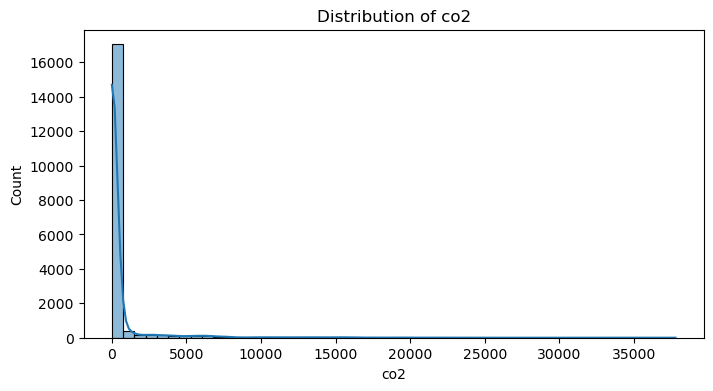

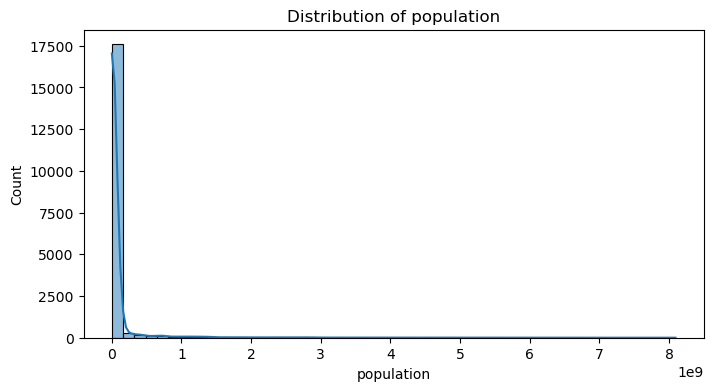

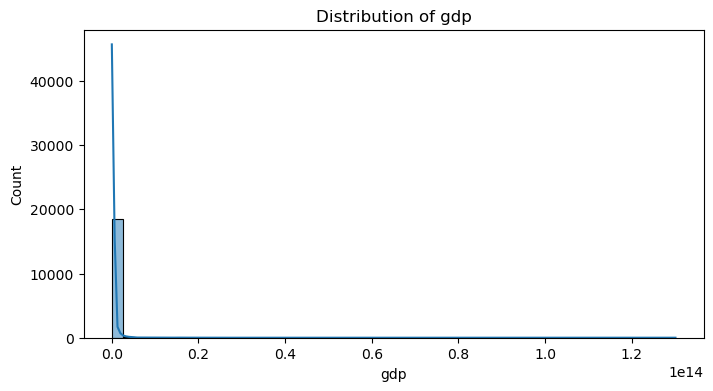

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["co2", "population", "gdp"]

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df_clean[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


C:\Users\Vedant\AppData\Local\Temp\ipykernel_26016\3218135956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_emitters.values, y=top_emitters.index, palette="Reds_r")


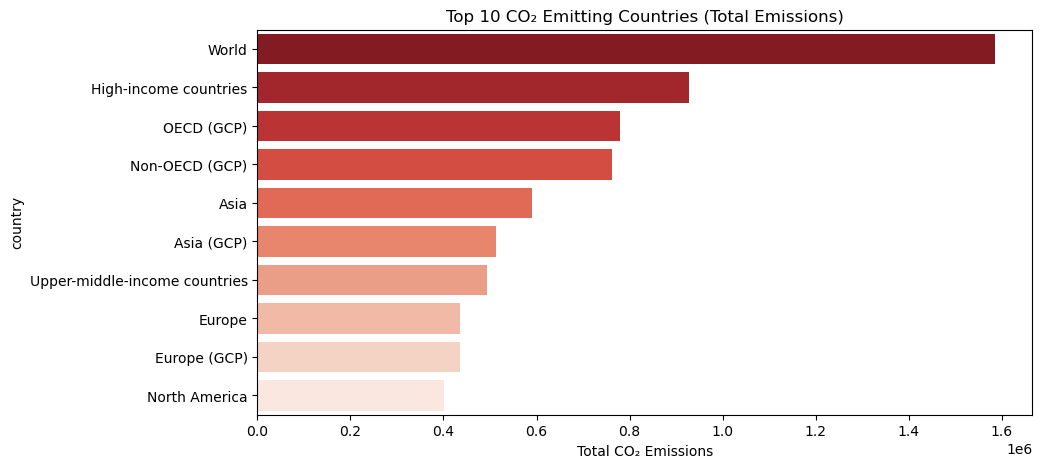

In [47]:
top_emitters = df_clean.groupby("country")["co2"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_emitters.values, y=top_emitters.index, palette="Reds_r")
plt.title("Top 10 CO₂ Emitting Countries (Total Emissions)")
plt.xlabel("Total CO₂ Emissions")
plt.show()


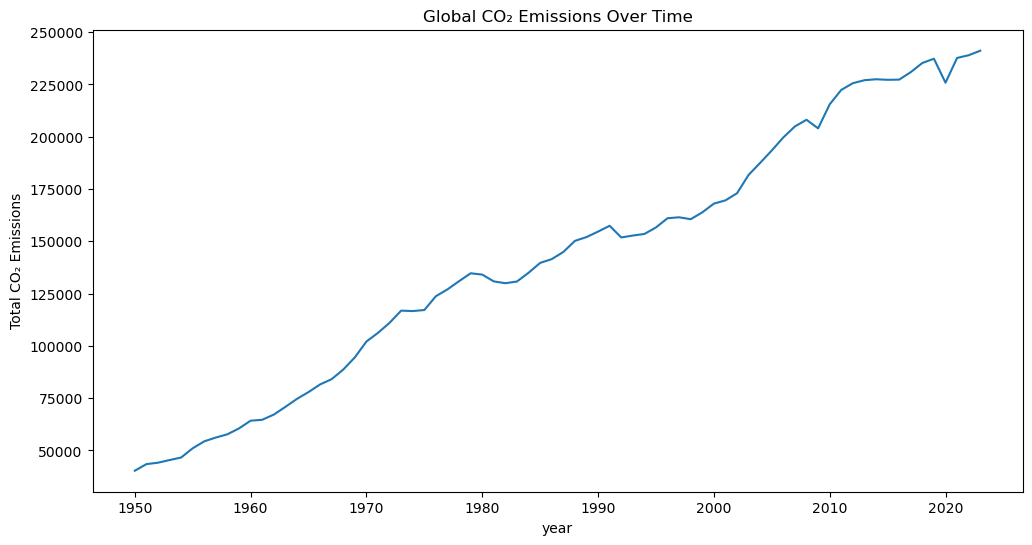

In [48]:
yearly_co2 = df_clean.groupby("year")["co2"].sum()
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_co2.index, y=yearly_co2.values)
plt.title("Global CO₂ Emissions Over Time")
plt.ylabel("Total CO₂ Emissions")
plt.show()
